

## YOLO-NAS-Pose model from [Deci AI](https://deci.ai/).





In [2]:
#!pip install super-gradients==3.4.0

#!pip install --upgrade super-gradients


# !pip install -qU git+https://github.com/Deci-AI/super-gradients.git@c601888ea384592f1493a3e7724b368acc76303f
# !pip install -qq git+https://github.com/ytdl-org/youtube-dl.git
# !pip install -qq gdown torchinfo

In [4]:
import super_gradients
import torch

super_gradients.__version__

'3.4.0'

In [5]:
torch.__version__

'1.12.1+cu116'

In [7]:
# @title Some standard imports
# Standard library imports
import json
import os
import random
from pathlib import Path
from typing import Any, List, Tuple, Union

# Third-party imports
import cv2
import gdown
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import torch
import yaml
from IPython.display import YouTubeVideo
from sklearn.model_selection import train_test_split

# Colab specific imports
#from google.colab.patches import cv2_imshow

# Constants
device = 'cuda' if torch.cuda.is_available() else 'cpu'


# 🫣 Sneak peek: Inference with YOLO-NAS-Pose


Start by instantiating a pretrained model. YOLO-NAS-Pose comes in three flavors: `yolo_nas_pose_s`, `yolo_nas_pose_m`, and `yolo_nas_pose_l`.

In [8]:
from super_gradients.training import models
from super_gradients.common.object_names import Models

yolo_nas_pose = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose").cuda()

Downloading: "https://sghub.deci.ai/models/yolo_nas_pose_l_coco_pose.pth" to C:\Users\f/.cache\torch\hub\checkpoints\yolo_nas_pose_l_coco_pose.pth


  0%|          | 0.00/304M [00:00<?, ?B/s]

You can run the following cell if you're interested in the architecture:

In [9]:
from torchinfo import summary

summary(model=yolo_nas_pose,
        input_size=(16, 3, 640, 640),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                           Input Shape          Output Shape         Param #              Trainable
YoloNASPose_L (YoloNASPose_L)                                     [16, 3, 640, 640]    [16, 8400, 4]        --                   True
├─NStageBackbone (backbone)                                       [16, 3, 640, 640]    [16, 96, 160, 160]   --                   True
│    └─YoloNASStem (stem)                                         [16, 3, 640, 640]    [16, 48, 320, 320]   --                   True
│    │    └─QARepVGGBlock (conv)                                  [16, 3, 640, 640]    [16, 48, 320, 320]   3,024                True
│    └─YoloNASStage (stage1)                                      [16, 48, 320, 320]   [16, 96, 160, 160]   --                   True
│    │    └─QARepVGGBlock (downsample)                            [16, 48, 320, 320]   [16, 96, 160, 160]   88,128               True
│    │    └─YoloNASCSPLayer (blocks)                     

## 🖼️ Inference on an image


Let's perform inference on the following image:

<img src='t.jpg'>


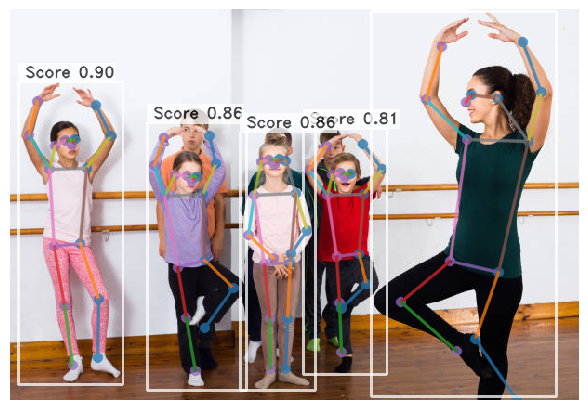

In [31]:
url = "t.jpg"
yolo_nas_pose.predict(url, conf=0.70).show()

yolo_nas_pose.predict(url, conf=0.70).save("detections.jpg")

# 🎥 Inference on video


In [13]:
video_name = 'a.mp4'
yolo_nas_pose.to(device).predict(video_name, conf=.75).save("detections.mp4")

Predicting Video: 100%|████████████████████████████████████████| 4385/4385 [01:28<00:00, 49.62it/s]


# Inference on webcam

In [2]:
import torch
from super_gradients.common.object_names import Models
from super_gradients.training import models


model = models.get("yolo_nas_pose_l", pretrained_weights="coco_pose").cuda()

# We want to use cuda if available to speed up inference.
model = model.to("cuda" if torch.cuda.is_available() else "cpu")
#model = model.to(device)

model.predict_webcam()

#model.predict_webcam(conf=.75)